In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [30]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS=50
CHANNELS=3

In [31]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("data/PlantVillage/",
                                                              shuffle=True,
                                                              image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                              batch_size = BATCH_SIZE
                                                             )

Found 2152 files belonging to 3 classes.


In [32]:
class_names = dataset.class_names

In [33]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

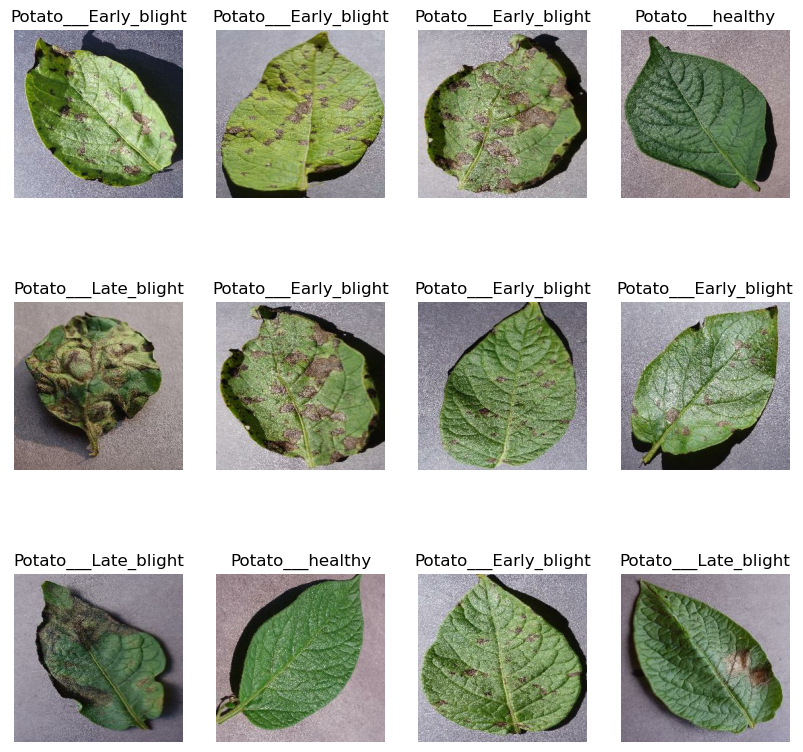

In [34]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [35]:
# 80% training, 10% validation, 10% test

In [36]:
def get_dataset_parts(ds,train_split=0.8,val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split* ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [37]:
train_ds, val_ds, test_ds = get_dataset_parts(dataset)

In [38]:
len(train_ds)

54

In [39]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [40]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [41]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [44]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),  
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

In [45]:
model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)           │ (32, 256, 256, 3)          │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ sequential_6 (Sequential)           │ (32, 256, 256, 3)          │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_20 (Conv2D)                  │ (32, 254, 254, 32)         │            896 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_20 (MaxPooling2D)     │ (32, 127, 127, 32)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_21 (Conv2D)                  │ (32, 125, 125, 64)         │         18,496 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_21 (MaxPooling2D)     │ (32, 62, 62, 64)           │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_22 (Conv2D)                  │ (32, 60, 60, 64)           │         36,928 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_22 (MaxPooling2D)     │ (32, 30, 30, 64)           │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_23 (Conv2D)                  │ (32, 28, 28, 64)           │         36,928 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_23 (MaxPooling2D)     │ (32, 14, 14, 64)           │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_24 (Conv2D)                  │ (32, 12, 12, 64)           │         36,928 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_24 (MaxPooling2D)     │ (32, 6, 6, 64)             │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ flatten_4 (Flatten)                 │ (32, 2304)                 │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_2 (Dense)                     │ (32, 64)                   │        147,520 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_3 (Dense)                     │ (32, 3)                    │            195 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)
                    

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.4429 - loss: 0.9273 - val_accuracy: 0.7135 - val_loss: 0.6403
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7653 - loss: 0.5260 - val_accuracy: 0.9010 - val_loss: 0.2512
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9009 - loss: 0.2735 - val_accuracy: 0.9115 - val_loss: 0.2631
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9287 - loss: 0.1949 - val_accuracy: 0.9323 - val_loss: 0.1709
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9484 - loss: 0.1279 - val_accuracy: 0.9323 - val_loss: 0.1870
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9553 - loss: 0.1090 - val_accuracy: 0.9583 - val_loss: 0.1025
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9626 - loss: 0.1014 - val_accuracy: 0.9219 - val_loss: 0.1988
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9464 - loss: 0.1502 - val_accuracy: 0.9792 - val_loss

In [49]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.9840 - loss: 0.1248


In [50]:
scores

[0.059716708958148956, 0.98828125]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

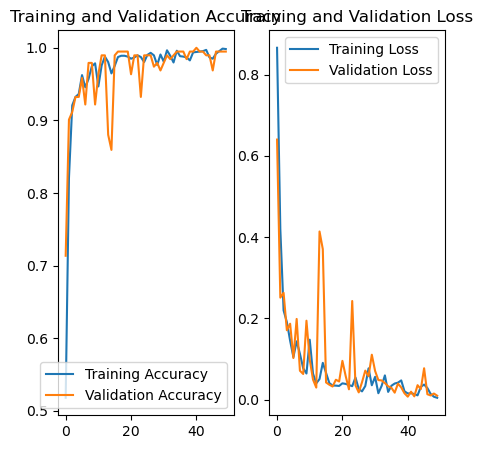

In [53]:
# building plot of Model's accuracy & loss wrt. epochs
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()